<a href="https://colab.research.google.com/github/baFILA001/US_House_price_prediction_using_key_Indicators/blob/main/us_housing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Analysis of Key Factors that influence US house prices
### The data collected for this assignment is from Federal Reserve Economic Data website. These datasets contain past 20 years of data on key supply-demand factors that influence US house prices nationally.



##Key Indicators that influence the US house prices highly or moderalety are listed below:

1. **GDP** - Gross Domestic Product (GDP): A measure of the economic performance of a country, representing the total value of all goods and services produced over a specific time period.

2. **CES2023610001** - Current Employment Statistics: This dataset likely contains information related to employment, such as the number of jobs, employment rates, and possibly industry-specific employment data.

3. **CIVPART** - Civilian Labor Force Participation Rate: It measures the proportion of the working-age population that is either employed or actively seeking employment.

4. **COMPUTSA** - Computer and Software Sales: This dataset may provide information on sales of computers and software, which can be an indicator of technology sector growth.

5. **CSUSHPINSA** - Case-Shiller U.S. National Home Price Index: Tracks changes in the value of residential real estate in various regions of the United States.

6. **EMRATIO** - Employment-to-Population Ratio: This ratio represents the proportion of a country's working-age population that is employed.

7. **HOUST** - Housing Starts: Measures the number of new residential construction projects that have begun during a specific time period.

8. **MORTGAGE30US** - 30-Year Fixed Rate Mortgage Average in the U.S.: Provides information on the average interest rate for 30-year fixed-rate mortgages.

9. **MSACSR** - Manufacturers' Shipments, Inventories, and Orders: This dataset likely includes information on the sales, inventories, and orders of manufacturers.

10. **MSPUS** - Median Sales Price of Houses Sold in the U.S.: Represents the median price at which houses are sold in the United States.

11. **PCU327310327310** - Industrial Production: Durable Goods: Industrial production measures the output of the industrial sector, and this specific dataset may focus on durable goods production.

12. **PCU32733132733106** - Industrial Production: Non-Durable Goods: Similar to the previous indicator but likely focuses on non-durable goods production.

13. **PERMIT** - Building Permits: Indicates the number of permits issued for new construction, a leading indicator of future construction activity.

14. **PI** - Personal Income: Measures the total income received by individuals, including wages, salaries, and other forms of income.

15. **POPTHM** - Population, Total: Represents the total population of a region or country.

16. **PSAVERT** - Personal Saving Rate: Measures the percentage of disposable income that individuals save.

17. **RSAHORUSQ156S** - Real Sales for Retail and Food Services: This likely includes information on the inflation-adjusted sales of retail and food services.

18. **UMCSENT** - University of Michigan Consumer Sentiment Index: A survey-based measure of consumer confidence in the overall economy.

19. **UNDCONTSA** - Total Unemployed, Plus Discouraged Workers: Includes the total number of unemployed individuals, as well as discouraged workers who have stopped looking for employment.

20. **UNRATE** - Unemployment Rate: Represents the percentage of the total labor force that is unemployed and actively seeking employment.

##These indicators are valuable for economists, policymakers, and analysts to assess the health and trends of an economy. They provide insights into various aspects such as employment, housing market, consumer sentiment, and overall economic activity.

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
from dataprep.eda import create_report

## Merging the csv file of all the Key Indicators that we have downloaded and Renaming them.

In [ ]:
directory_path = "Cleaned data"
os.makedirs(directory_path, exist_ok=True)

def clean_and_save(file_name, column_name, new_column_name):
    df = pd.read_csv(file_name)
    df['DATE'] = pd.to_datetime(df['DATE'])
    df.set_index('DATE', inplace=True)
    df.rename(columns={column_name: new_column_name}, inplace=True)
    df = df.resample('D').asfreq()
    df[new_column_name] = df[new_column_name].interpolate(method='linear')
    df = df["2003-01-01":"2023-01-01"]
    df.to_csv(f"Cleaned data/{new_column_name.lower()}.csv")
    return df


data_files = ["GDP.csv", "CES2023610001.csv", "CIVPART.csv", "COMPUTSA.csv",
              "CSUSHPINSA.csv", "EMRATIO.csv", "HOUST.csv", "MORTGAGE30US.csv",
              "MSACSR.csv", "MSPUS.csv", "PCU327310327310.csv", "PCU32733132733106.csv",
              "PERMIT.csv", "PI.csv", "POPTHM.csv", "PSAVERT.csv", "RSAHORUSQ156S.csv",
              "UMCSENT.csv", "UNDCONTSA.csv", "UNRATE.csv"]

column_names = ["GDP", "CES2023610001", "CIVPART", "COMPUTSA", "CSUSHPINSA",
                "EMRATIO", "HOUST", "MORTGAGE30US", "MSACSR", "MSPUS",
                "PCU327310327310", "PCU32733132733106", "PERMIT", "PI",
                "POPTHM", "PSAVERT", "RSAHORUSQ156S", "UMCSENT", "UNDCONTSA", "UNRATE"]

new_column_names = ['gdp', 'all_Const_Emp', 'labor_percent', 'House_starts', 'house_price',
                    'emp_ratio', 'new_private_house', 'mortgage_rate','monthly_supply',
                    'median_sales_price', 'PPI_Cement', 'PPI_Concrete', 'permit', 'personal_income', 'population',
                    'personal_saving_rate', 'home_ow_rate', 'uni_senti', 'new_private_hw_under',
                    'unemployed_rate']

# List to store cleaned DataFrames
cleaned_dataframes = []

# Cleaning and saving data using the function
for file, col, new_col in zip(data_files, column_names, new_column_names):
    cleaned_df = clean_and_save(file, col, new_col)
    cleaned_dataframes.append(cleaned_df)

# Merging cleaned DataFrames based on the 'DATE' index
merged_df = cleaned_dataframes[0]
for df in cleaned_dataframes[1:]:
    merged_df = merged_df.merge(df, left_index=True, right_index=True, how='outer')

# Saving the merged DataFrame to a CSV file
merged_df.to_csv("Cleaned data/merged_data.csv")


## Using the below code we can see all the columns that get's hide usually because of the column limits.

In [ ]:
pd.set_option('display.max_columns', None)

## After getting merge and saving,the new csv file will get read and the DATE column within the dataset will become an index to convert the dateset into regression based for some amount of time.

In [ ]:
df=pd.read_csv('/content/Cleaned data/merged_data.csv')
df.set_index('DATE',inplace=True)
df.head()

,gdp,all_Const_Emp,labor_percent,House_starts,house_price,emp_ratio,new_private_house,mortgage_rate,monthly_supply,median_sales_price,PPI_Cement,PPI_Concrete,permit,personal_income,population,personal_saving_rate,home_ow_rate,uni_senti,new_private_hw_under,unemployed_rate
DATE,,,,,,,,,,,,,,,,,,,,
2003-01-01,11174.129000,817.800000,66.4,1654.000000,127.652000,62.5,1853.000000,NaN,4.000000,186000.000000,151.000000,150.500000,1808.000000,9290.100000,289412.000000,5.300000,68.100000,82.400000,1049.000000,5.800000
2003-01-02,11175.669411,817.796774,66.4,1655.096774,127.673742,62.5,1845.774194,NaN,4.016129,186064.444444,151.003226,150.561290,1809.483871,9290.296774,289418.258065,5.296774,68.101111,82.319355,1048.838710,5.803226
2003-01-03,11177.209822,817.793548,66.4,1656.193548,127.695484,62.5,1838.548387,5.850000,4.032258,186128.888889,151.006452,150.622581,1810.967742,9290.493548,289424.516129,5.293548,68.102222,82.238710,1048.677419,5.806452
2003-01-04,11178.750233,817.790323,66.4,1657.290323,127.717226,62.5,1831.322581,5.864286,4.048387,186193.333333,151.009677,150.683871,1812.451613,9290.690323,289430.774194,5.290323,68.103333,82.158065,1048.516129,5.809677
2003-01-05,11180.290644,817.787097,66.4,1658.387097,127.738968,62.5,1824.096774,5.878571,4.064516,186257.777778,151.012903,150.745161,1813.935484,9290.887097,289437.032258,5.287097,68.104444,82.077419,1048.354839,5.812903


## Will do the Forward and Back Filling to fill NAN values within the dataset.

In [ ]:

df.ffill(inplace=True)
df.bfill(inplace=True)

##**1.** Will create the hist and box plot of all the key indicators to see if they are normally distributed or not.

##**2.**If not then there will be outliers present within the data and we can see those outliers with the help of box plots.

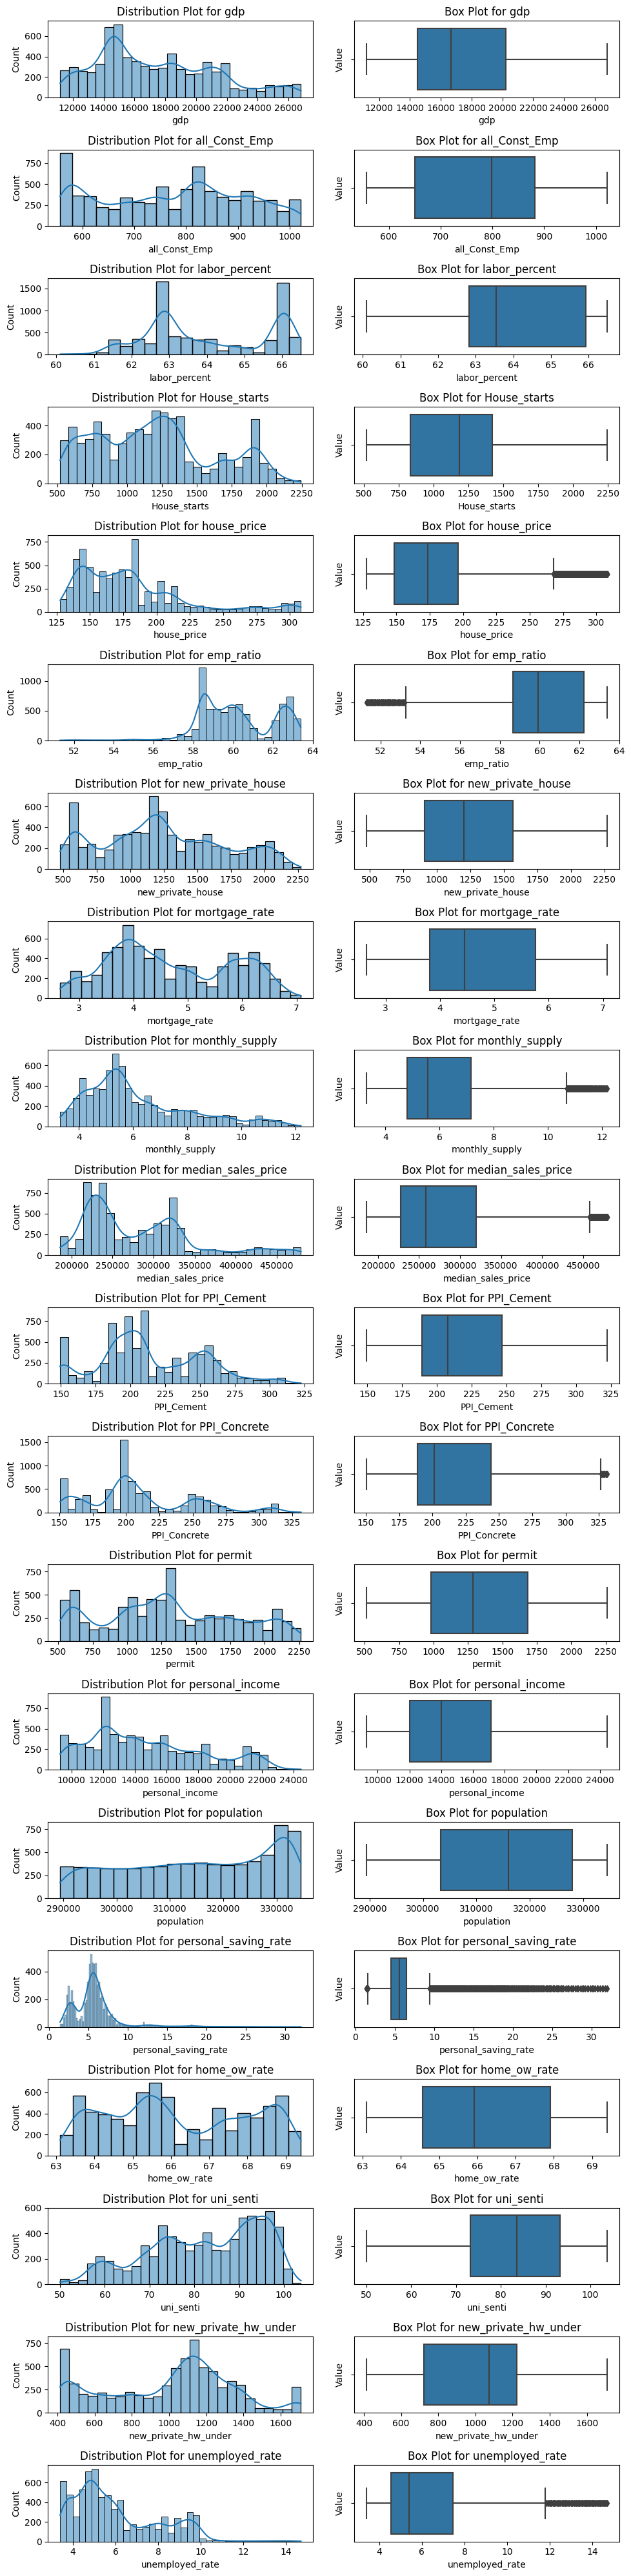

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 2 * len(df.columns)))

# Loop through each column
for i, col in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 2, 2 * i - 1)

    # Distribution plot
    sns.histplot(data=df, x=col, kde=True)
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')

    # Creating a subplot for the box plot
    plt.subplot(len(df.columns), 2, 2 * i)

    # Box plot
    sns.boxplot(data=df, x=col)
    plt.xlabel(f"{col}")
    plt.ylabel("Value")
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()


##**1.**After finding the variables which contains the outliers we will use upper bound and lower bound to remove the outliers.
##**2.**If some outliers still remains then we will directly refer the boxplot and will remove the outliers using dropna function.

In [ ]:
def remove_outliers_iqr(df, columns, factor=1.5):
    for column in columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - factor * iqr
        upper_bound = q3 + factor * iqr
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

columns_with_outliers = ['house_price', 'emp_ratio', 'monthly_supply', 'median_sales_price', 'PPI_Concrete', 'personal_saving_rate', 'unemployed_rate']

df = remove_outliers_iqr(df, columns_with_outliers)

df['personal_saving_rate'] = df['personal_saving_rate'].loc[(df['personal_saving_rate'] >= 3.5) & (df['personal_saving_rate'] <= 8)].dropna()
df['monthly_supply'] = df['monthly_supply'].loc[(df['monthly_supply'] <= 9.1)].dropna()


## After outliers are removed will again create the hist and box plot of every variables to check the normality of them all.

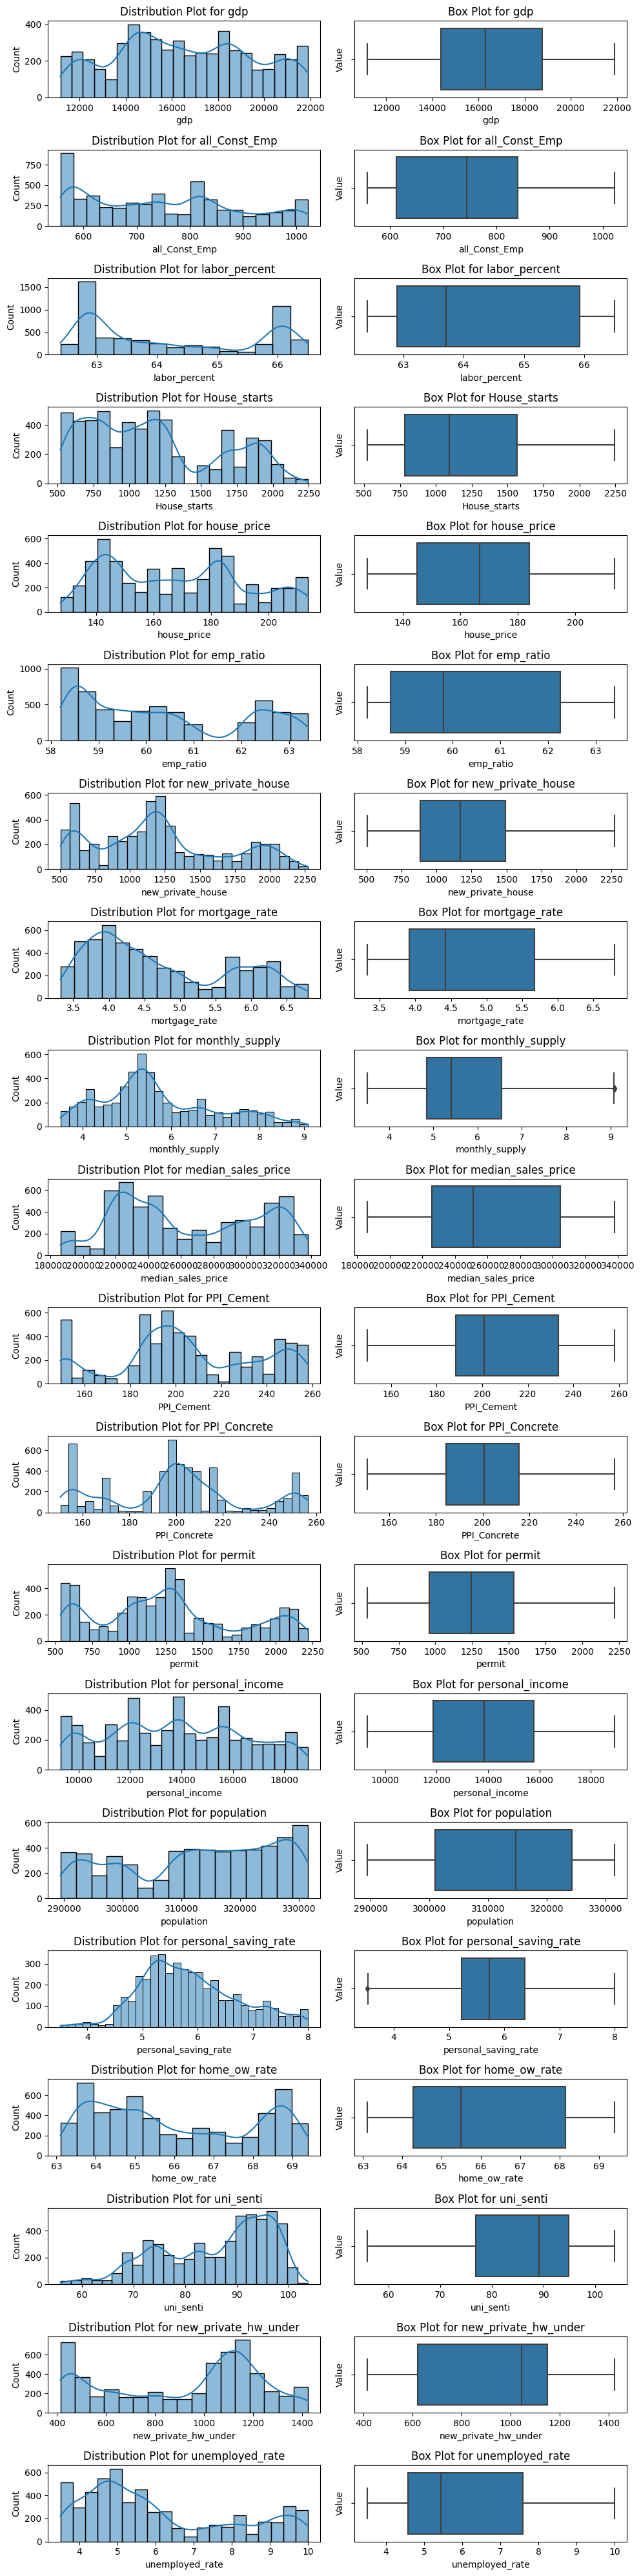

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 2 * len(df.columns)))

# Loop through each column
for i, col in enumerate(df.columns, 1):
    plt.subplot(len(df.columns), 2, 2 * i - 1)

    # Distribution plot
    sns.histplot(data=df, x=col, kde=True)
    plt.xlabel(f"{col}")
    plt.ylabel("Count")
    plt.title(f'Distribution Plot for {col}')

    # Creating a subplot for the box plot
    plt.subplot(len(df.columns), 2, 2 * i)

    # Box plot
    sns.boxplot(data=df, x=col)
    plt.xlabel(f"{col}")
    plt.ylabel("Value")
    plt.title(f'Box Plot for {col}')

plt.tight_layout()
plt.show()


##**1.** Will do "Shapiro-Wilk Test" also after plotting to check if the whole data is normally distributed or not.
##**2.** During test the p_value will get generated and if the value will be above "0.05" then the dataset will be normally distributed otherwise not.

In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(df)

alpha = 0.05
if p_value > alpha:
    print("The data appears to be normally distributed (fail to reject H0)")
else:
    print("The data does not appear to be normally distributed (reject H0)")


WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.10/dist-packages/scipy/stats/_morestats.py:1882: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")

  warnings.warn("p-value may not be accurate for N > 5000.")



The data appears to be normally distributed (fail to reject H0)


##**1.** Will check the correlation of house_price(target_variable) with all other variables.
##**2.** Will create the heat map of all the variables to check there correllation with each others.

correlation of variables with target variable house_price             1.000000
PPI_Cement              0.848971
median_sales_price      0.835075
gdp                     0.723369
personal_income         0.702765
uni_senti               0.674712
PPI_Concrete            0.660008
new_private_hw_under    0.615448
population              0.597753
all_Const_Emp           0.468268
emp_ratio               0.291521
House_starts            0.282513
permit                  0.264817
new_private_house       0.245671
personal_saving_rate    0.221064
monthly_supply          0.136488
mortgage_rate          -0.150049
home_ow_rate           -0.393526
labor_percent          -0.397102
unemployed_rate        -0.814289
Name: house_price, dtype: float64


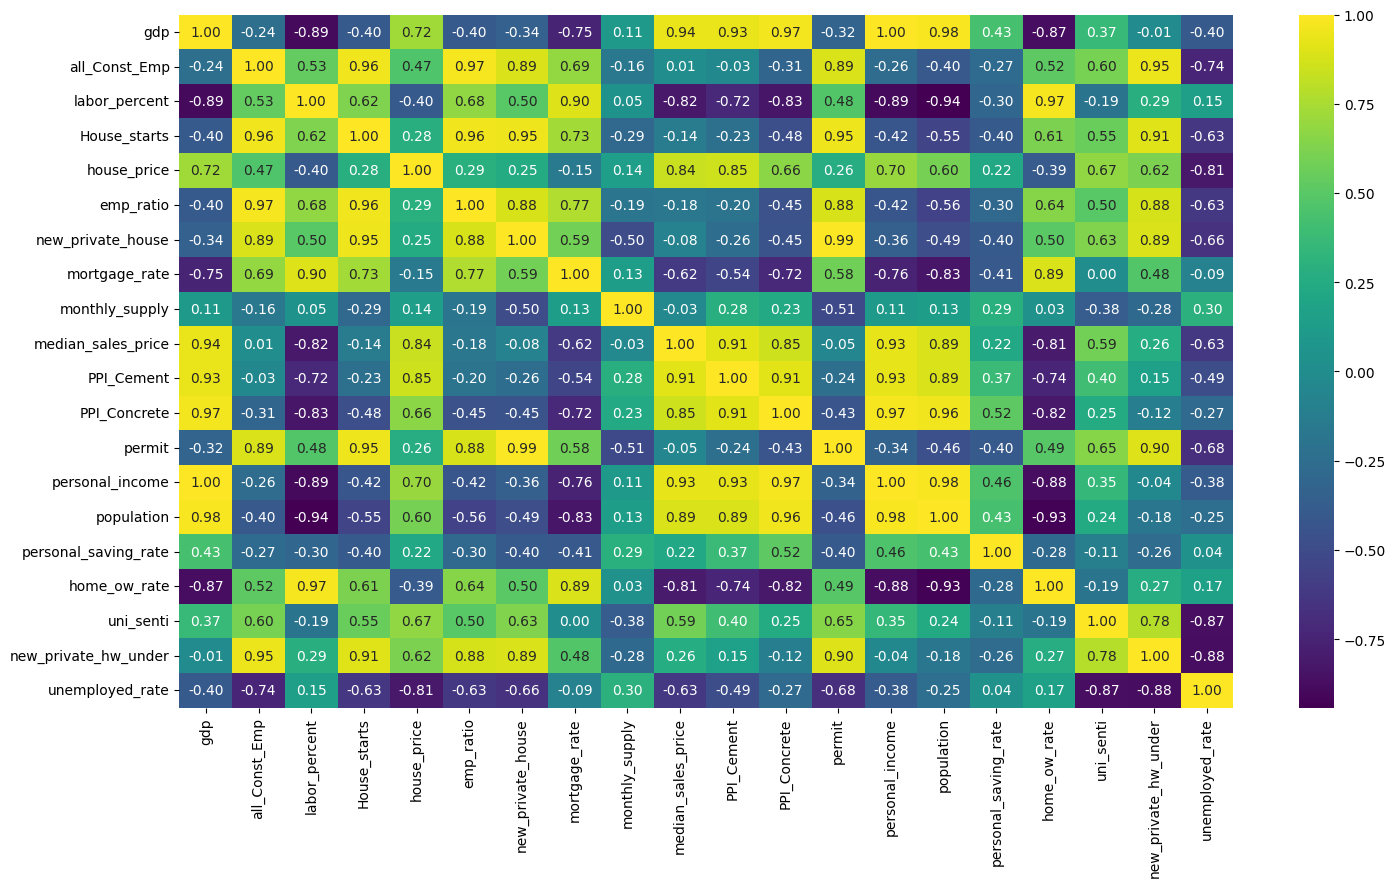

In [ ]:
plt.figure(figsize=(17,9))
sns.heatmap(data=df.corr(),fmt='.2f',annot=True,cmap='viridis')

corr_matrix= df.corr()
print('correlation of variables with target variable',corr_matrix['house_price'].sort_values(ascending=False))


## Seperate the Dependent and Independent variables.

In [ ]:
X=df.drop('house_price',axis=1)
y=df['house_price']

## Will apply the standard scalling on Independent Variables to scale them within smaller ranges.

In [ ]:
from sklearn.preprocessing import StandardScaler
column_names = X.columns
sc=StandardScaler()
X=sc.fit_transform(X)
X = pd.DataFrame(X, columns=column_names)


## Will apply Forward Fill to fill the remaining NAN values

In [ ]:
X.ffill(inplace=True)

## Apply Lasso Cross Validation to find the best features withing the independent variable set.

In [ ]:
from sklearn.linear_model import LassoCV

model = LassoCV()
fit = model.fit(X, y)

selected_features = (fit.coef_ != 0)
print(selected_features)

[ True  True False  True  True False  True  True  True  True False  True
 False False  True  True  True False  True]


In [ ]:
X.columns

Index(['gdp', 'all_Const_Emp', 'labor_percent', 'House_starts', 'emp_ratio',
       'new_private_house', 'mortgage_rate', 'monthly_supply',
       'median_sales_price', 'PPI_Cement', 'PPI_Concrete', 'permit',
       'personal_income', 'population', 'personal_saving_rate', 'home_ow_rate',
       'uni_senti', 'new_private_hw_under', 'unemployed_rate'],
      dtype='object')

## Will remove the least correlated variables from the set.

In [ ]:
columns_to_drop = ['labor_percent', 'new_private_house', 'PPI_Concrete', 'personal_income', 'population', 'new_private_hw_under']
X_selected=X.drop(columns=columns_to_drop)

##**1.**Will do the train_test_split and will do the 80:20 split of the data.
##**2.** Will create 2 set's of split data in which one will contain all variables and the other will have only the LassoCV selected best variables.

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train_best,X_test_best,y_train_best,y_test_best=train_test_split(X_selected,y,train_size=0.8,random_state=42)

##Linear Regression
### Using all independent variables

In [ ]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(X_train,y_train)
y_pred_test=le.predict(X_test)
y_pred_train=le.predict(X_train)

from sklearn.metrics import r2_score
accuracy_1=r2_score(y_pred_test,y_test)

from sklearn.metrics import r2_score
accuracy_2=r2_score(y_pred_train,y_train)
print(f"Train data accuracy: {accuracy_1} and Test data accuracy: {accuracy_2}")


Train data accuracy: 0.9954710161897311 and Test data accuracy: 0.9952030391008585


## Linear Regression
### Using Best selected independent variables

In [ ]:
from sklearn.linear_model import LinearRegression
le=LinearRegression()
le.fit(X_train_best,y_train_best)
y_pred_test=le.predict(X_test_best)
y_pred_train=le.predict(X_train_best)

from sklearn.metrics import r2_score
accuracy_1=r2_score(y_pred_test,y_test_best)

from sklearn.metrics import r2_score
accuracy_2=r2_score(y_pred_train,y_train_best)
print(f"Train data accuracy: {accuracy_1} and Test data accuracy: {accuracy_2}")

Train data accuracy: 0.995237487187281 and Test data accuracy: 0.9947317309467126


#Based on the correlation analysis on the dataset key insights can be derived such as:

##**1.** Supply factors such as cement,concrete production and the number of authorized housing units conpleted and under construction have a positive influence on home prices. The higher construction spending on residential projects means higher home prices.
##**2.**Demand factor such as mortgage rates, Population,  Building Permits, Median Sales Price can have a negative impact on home prices. Higher mortgage rates and lower consumer sentiment means lower home prices.
##**3.**Economic factors such as GDP, personal income also play a crucial role in determining home prices. A strong economy with higher GDP and slightly lower interest rates tends to support higher home prices.
##**4.**The median sales price of houses sold is strongly correlated with home prices, reflecting the importance of market dynamics and buyer behaviour in determining home price movements.
##These insights can be valuable for various stakeholders in the real estate market, including home buyers, sellers, developers, and policymakers.
##And understanding the factors that influence home prices can help make good decisions related to investments, financing, and economic policies.